In [ ]:
# Ideas

In [9]:
from datetime import datetime

import pydub
from pydub import AudioSegment, playback
import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

import mp3_util
from const import SAMPLES_PER_SEC, FILE_LENGTH

In [2]:
Ntby2 = int(FILE_LENGTH * SAMPLES_PER_SEC /2)

In [8]:
%load_ext autoreload
%autoreload 2

In [10]:

import pickle

In [11]:
with open('total_spec', 'rb') as f:
    total_spec = pickle.load(f)

In [5]:
len(total_spec)

7200000

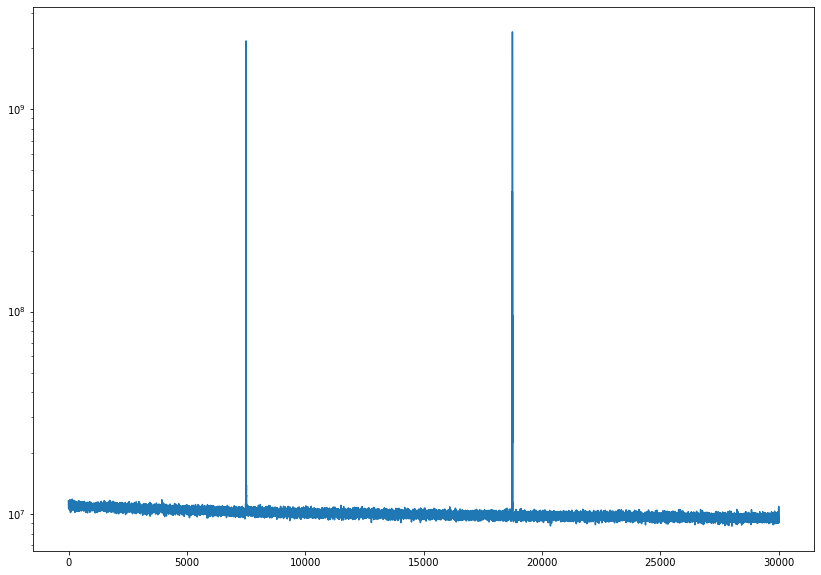

In [35]:
plt.figure(figsize=(14,10))
plt.semilogy(total_spec[3000000:Ntby2:20])

In [13]:
mp3_arr = mp3_util.load_mp3_arr_from_datetime(datetime(2015,2,8,14))

In [39]:
mp3_filt, fw, fw_filt = mp3_util.remove_noise_wiener(mp3_arr,total_spec)

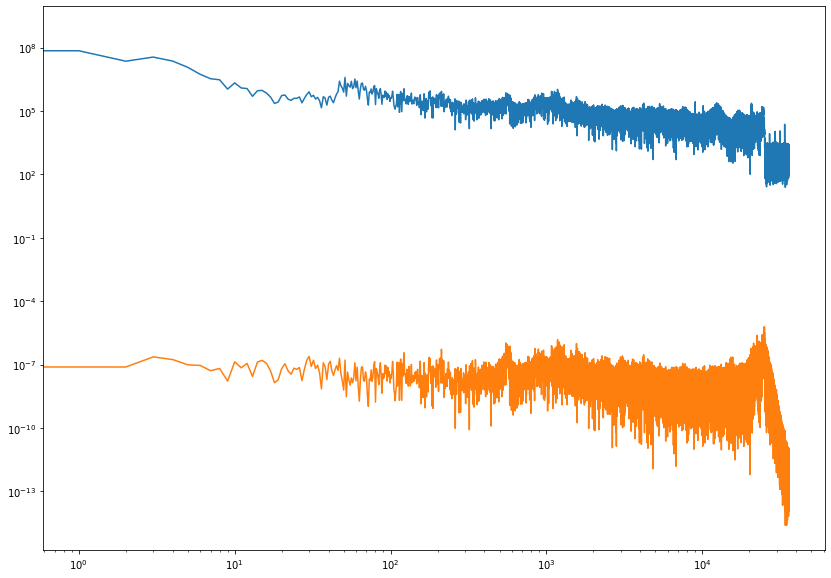

In [40]:
plt.figure(figsize=(14,10))
plt.loglog(fw[:Ntby2:100])
plt.loglog(fw_filt[:Ntby2:100])

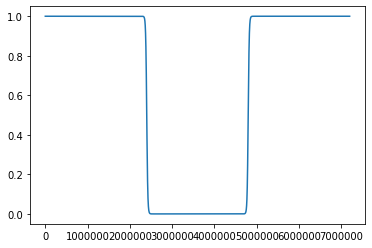

In [38]:
w0 = 8000 * FILE_LENGTH
plt.plot(mp3_util.low_pass_filter(np.arange(7200000),w0,200))

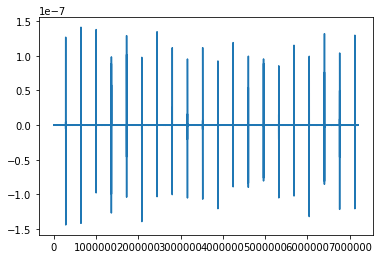

In [41]:
plt.plot(mp3_filt)

In [22]:
from scipy.io import wavfile

In [29]:
mp3_arr=np.array(mp3_arr)

In [30]:
mp3_arr[:100]

array([207, 270, 280, 288, 296, 298, 296, 276, 250, 249, 255, 256, 271,
       287, 280, 269, 284, 302, 307, 302, 286, 267, 260, 264, 260, 255,
       270, 292, 301, 298, 286, 270, 270, 286, 287, 281, 285, 285, 273,
       272, 277, 279, 285, 300, 310, 312, 311, 308, 306, 304, 303, 304,
       305, 303, 300, 292, 290, 298, 298, 293, 302, 313, 307, 295, 282,
       280, 299, 323, 326, 318, 310, 298, 290, 283, 269, 260, 267, 276,
       285, 288, 278, 268, 267, 258, 248, 258, 267, 254, 244, 251, 252,
       231, 213, 225, 252, 249, 220, 212, 240, 273], dtype=int16)

In [42]:
mp3_filt[:100]

array([ 3.01792896e-10, -2.83653462e-10, -2.00264805e-10,  2.84952895e-10,
       -3.66953329e-10, -4.55817779e-11,  2.18633514e-10, -3.87626903e-10,
        6.19331392e-11,  1.17273719e-10, -3.20552723e-10,  1.14559799e-10,
       -1.89531151e-11, -2.30977168e-10,  1.22769614e-10, -1.15964058e-10,
       -1.04374641e-10,  1.07661449e-10, -1.98067410e-10, -1.97984060e-11,
        6.16750401e-11, -2.36370395e-10,  5.00457488e-11,  1.58224978e-11,
       -2.37497910e-10,  9.79632001e-11, -2.39555285e-11, -2.14298981e-10,
        1.26164260e-10, -6.32348410e-11, -2.13371529e-10,  1.17439336e-10,
       -6.00285377e-11, -1.82421078e-10,  7.86029575e-11, -5.83761511e-11,
       -1.46734541e-10,  8.80915826e-12, -7.66866709e-11, -8.95450172e-11,
       -2.22592864e-11, -8.35859298e-11, -5.38903228e-11, -7.27520960e-11,
       -9.09718689e-11, -3.37480803e-12, -1.08210989e-10, -9.59674701e-11,
        5.98046265e-11, -1.23097768e-10, -1.27737945e-10,  8.80135062e-11,
       -9.51962190e-11, -

In [31]:
wavfile.write('og.wav', 24000, mp3_arr)
wavfile.write('filt.wav', 24000, mp3_filt)

In [43]:
len(mp3_arr)

7200000

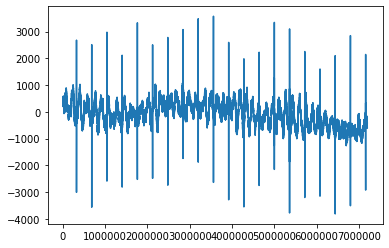

In [45]:
plt.plot(mp3_arr)


So, looks like the rough filtering algorithm just detects the weird chirping in the data.

There's a regular chirping (an artifact of the data cleaning?)

In [46]:
from scipy.signal import stft

In [151]:
def get_spectrogram(mp3_arr, fs=24000, nperseg=4096):

    f, t, Zft = stft(mp3_arr, fs=fs, nperseg=nperseg)
    Zft = Zft[::-1, :]  # reverse freq axis for log
    fig, ax = plt.subplots(figsize=(15,10))
    plt.imshow(np.log10(np.abs(Zft)+1), extent=[0,max(t),f[1],f[-1]], aspect='auto')
    ax.set_yscale('log')
    plt.show()

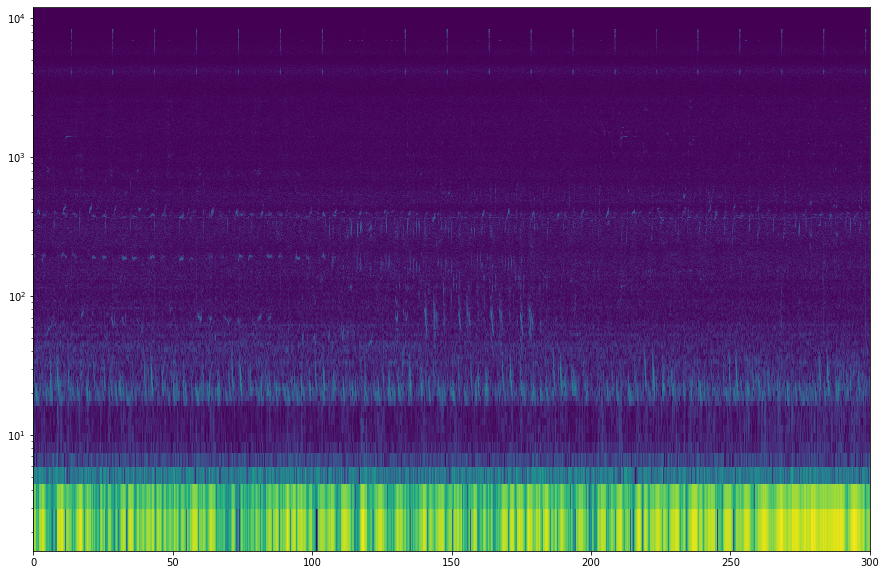

In [154]:
get_spectrogram(mp3_arr, nperseg=16384)

In [145]:
# flip y-axis upside down
Zft = Zft[::-1, :]

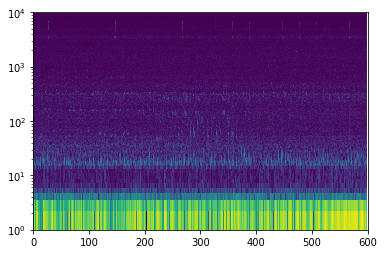

In [146]:
fig, ax = plt.subplots()
plt.imshow(np.log10(np.abs(Zft)+1), extent=[0,600,1,10000], aspect='auto')
ax.set_yscale('log')
#plt.specgram(mp3_arr, Fs=24000, NFFT=4096);
#plt.show()

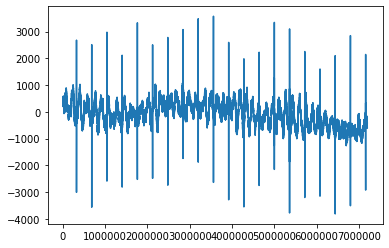

In [108]:
plt.plot(mp3_arr)

In [63]:
max(f), max(t)

(6000.0, 600.064)